In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [279]:
y=pd.read_csv('Bank_Churn.csv')
y

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [278]:
df=pd.read_csv('Bank_Churn.csv')
df=df.drop(['CustomerId','Surname'],axis=1)
exited=df['Exited']
df=df.drop('Exited',axis=1)
df['Geography'].unique()
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [275]:
clean_df=pd.get_dummies(data=df, dtype=int  ,prefix="", prefix_sep='')
clean_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [188]:
des=clean_df.describe()
des

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


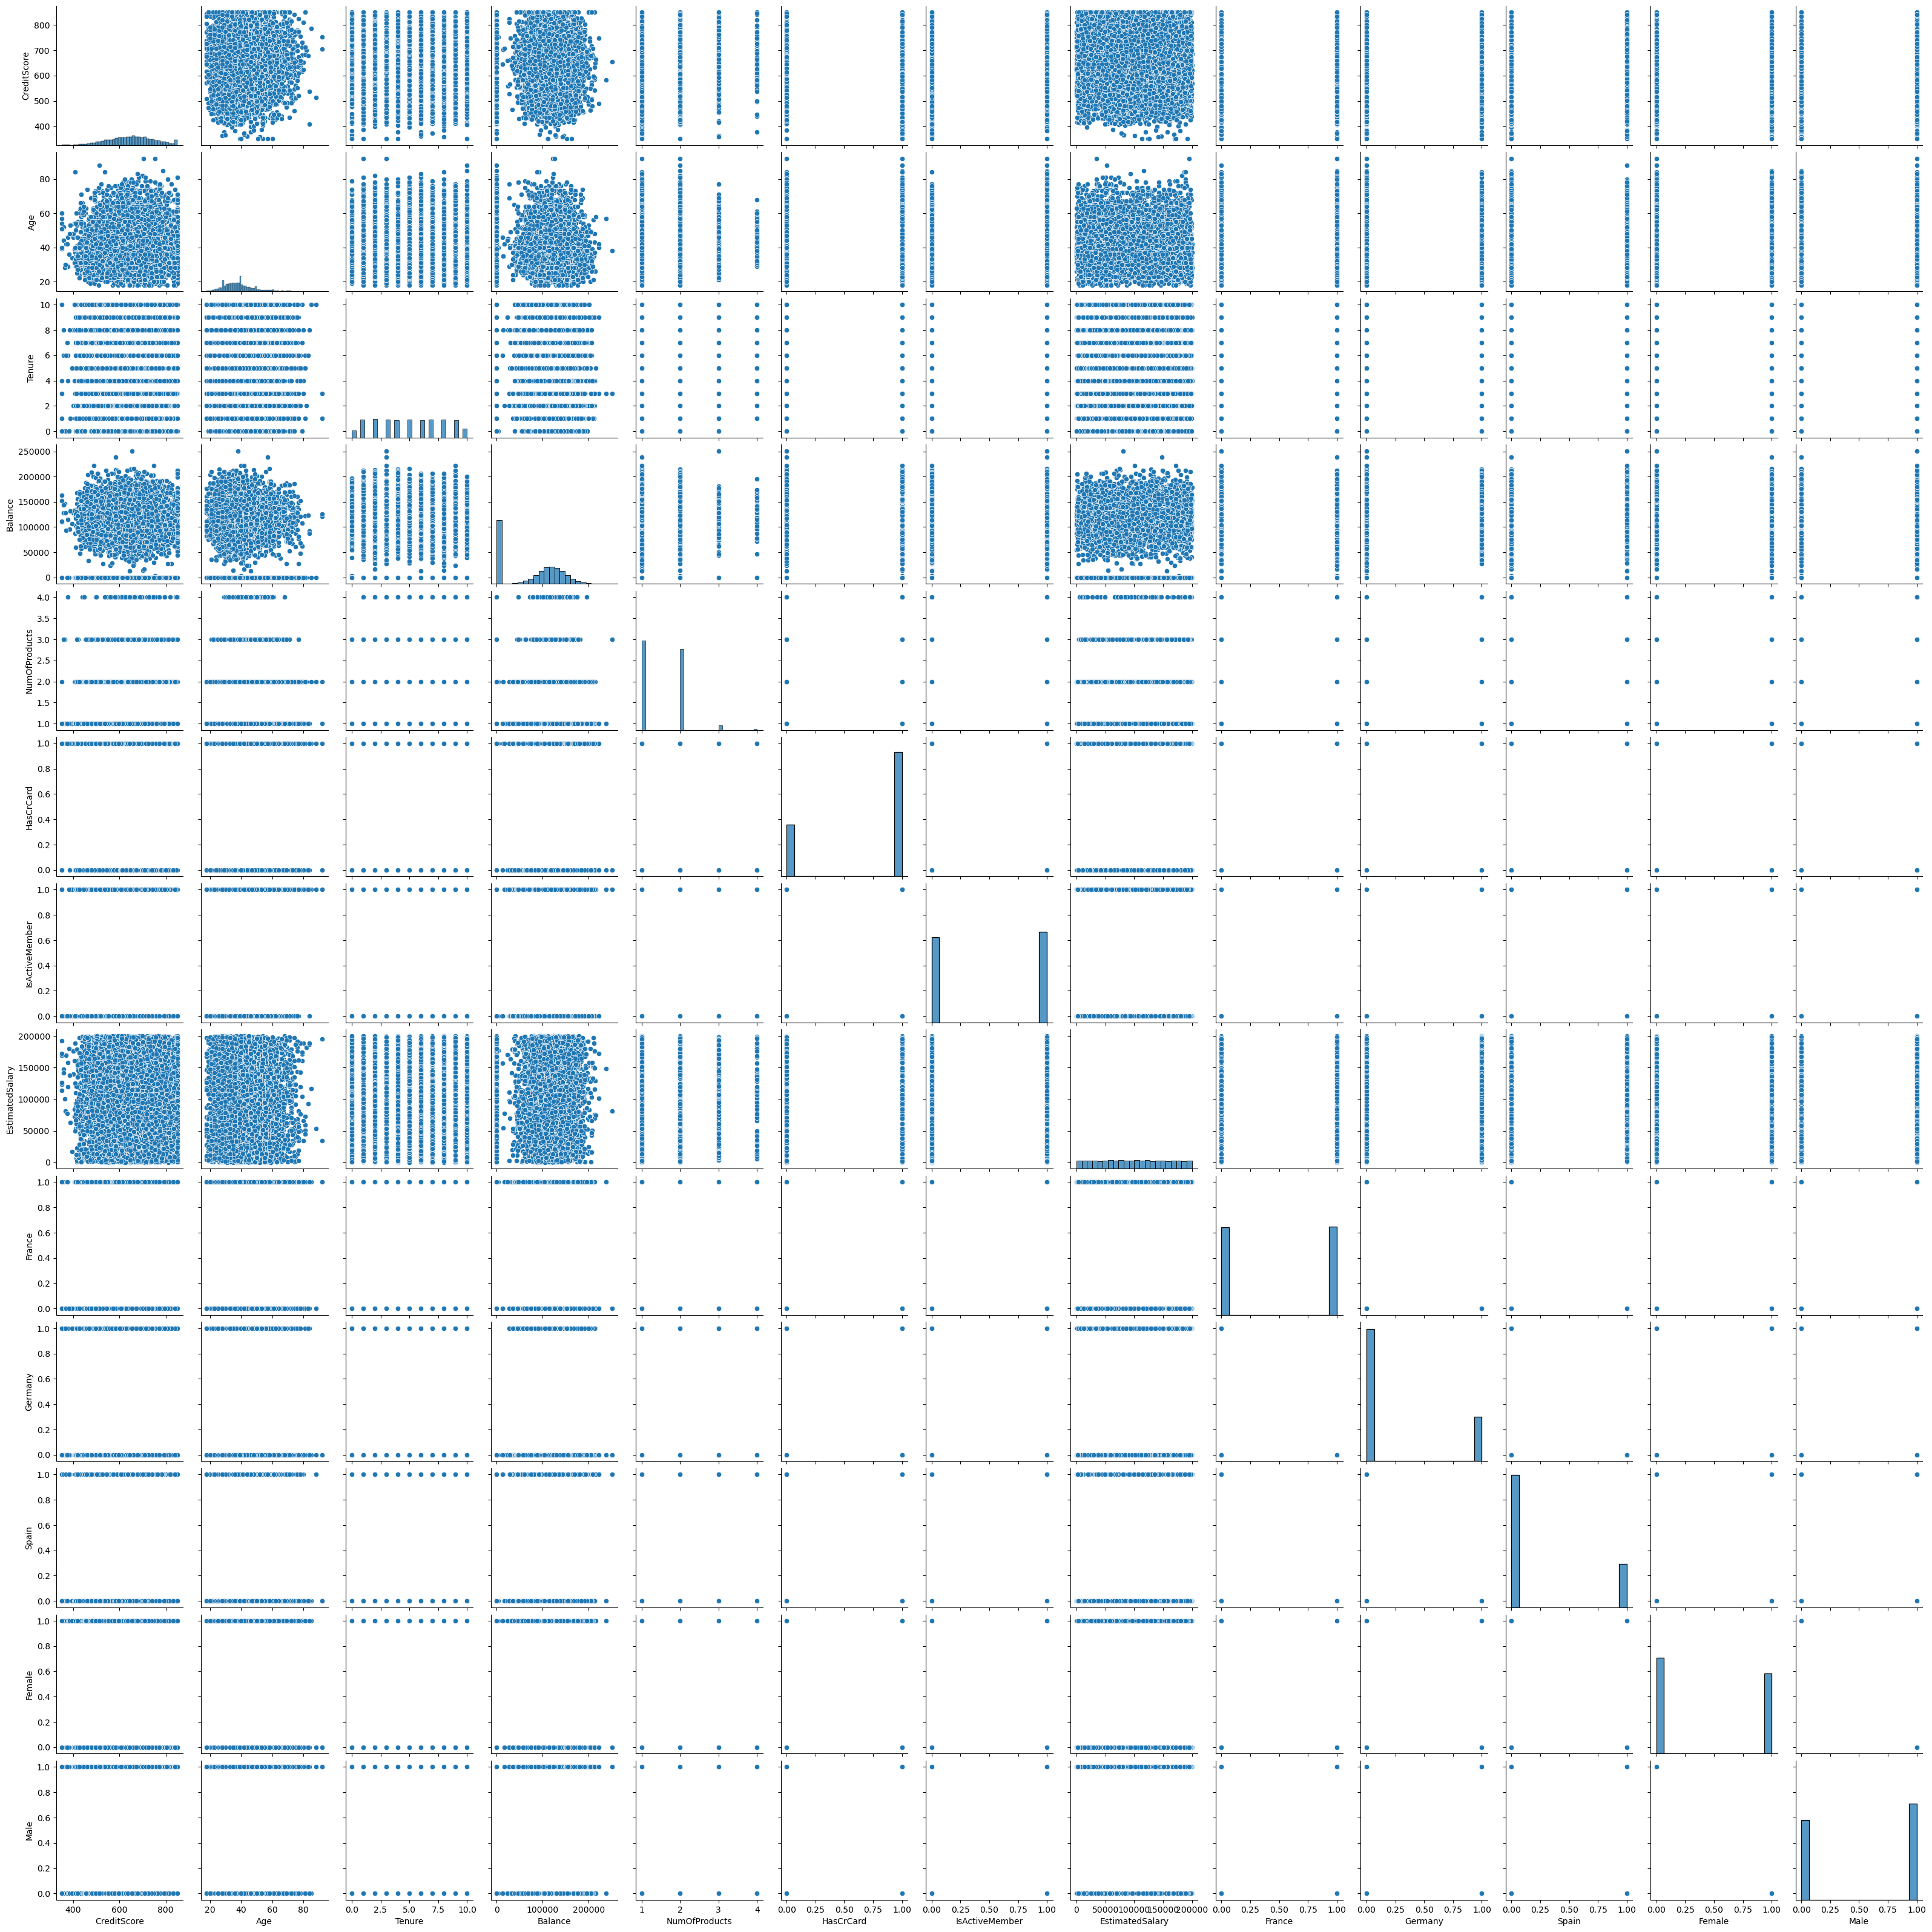

In [189]:
sns.pairplot(data=clean_df)

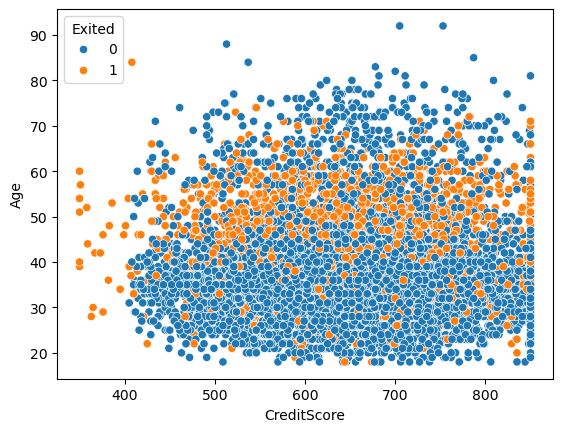

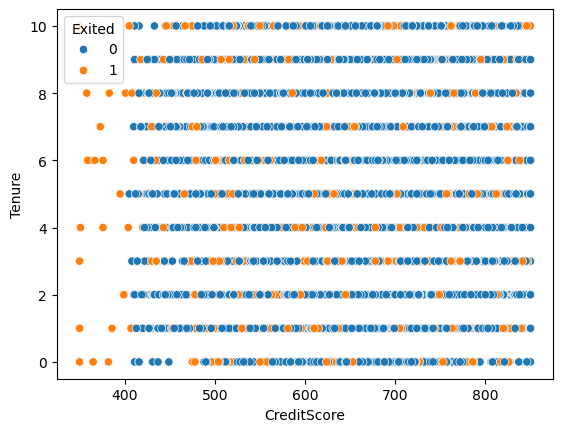

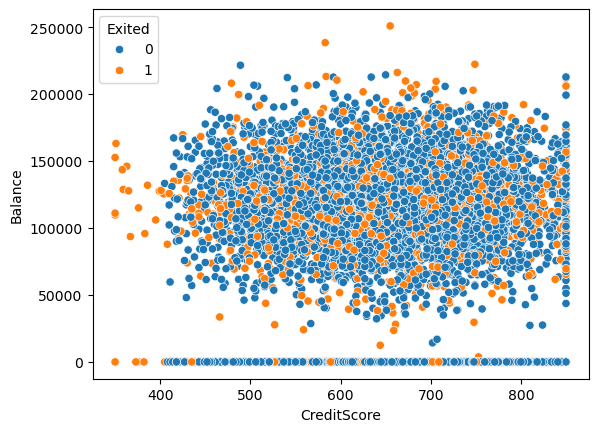

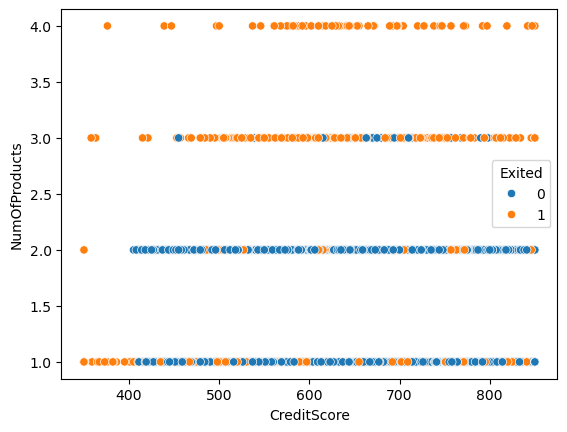

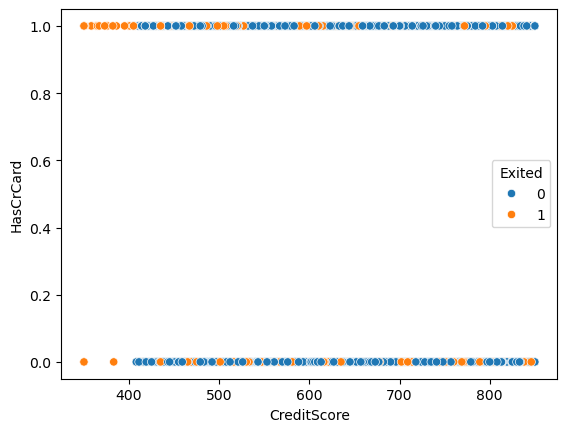

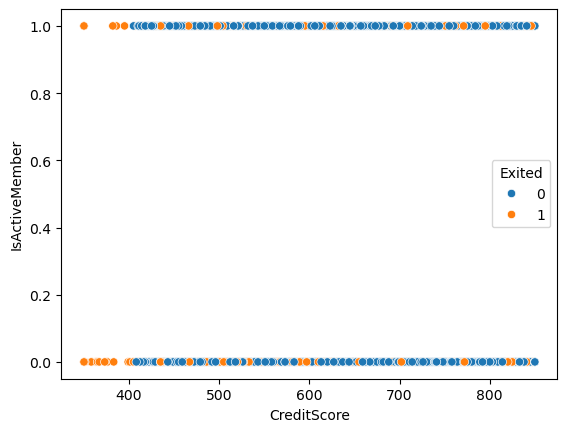

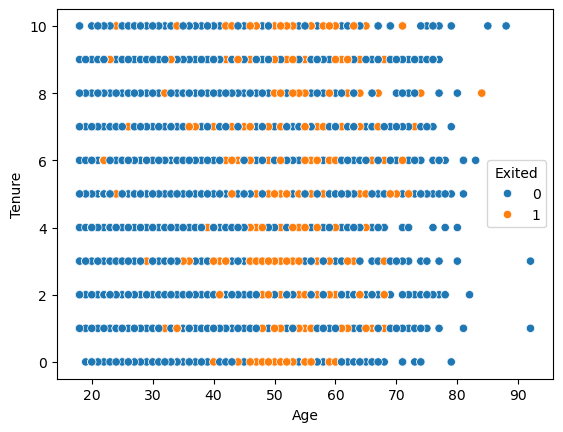

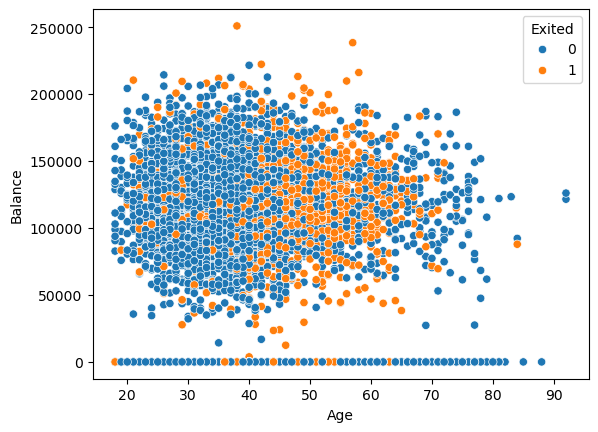

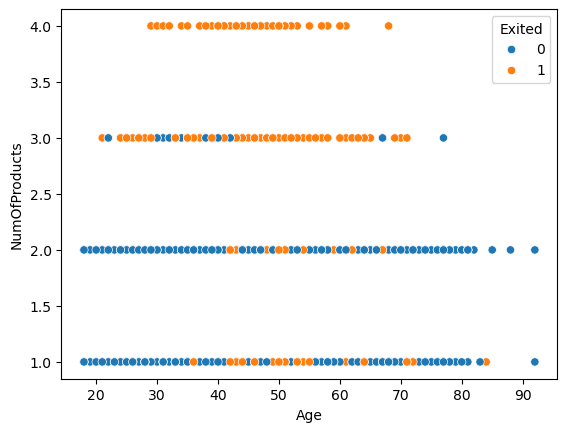

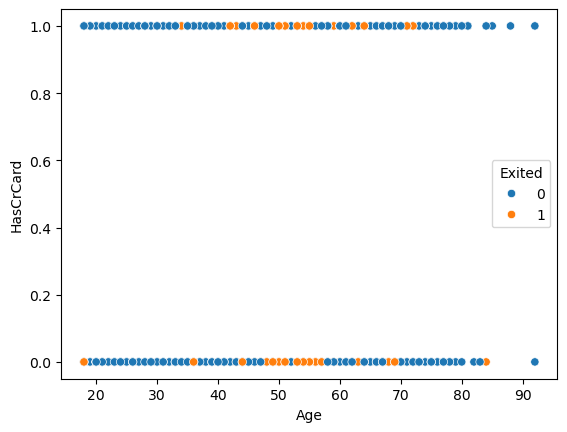

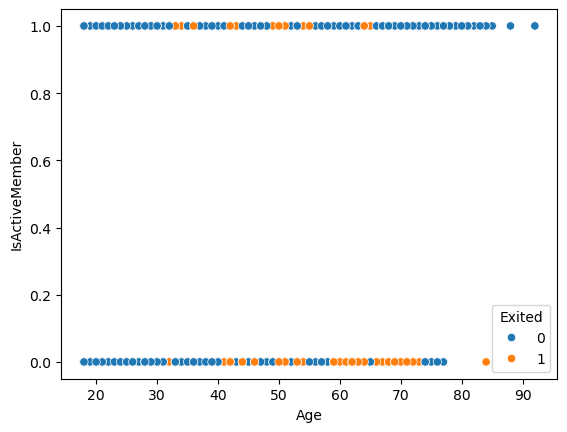

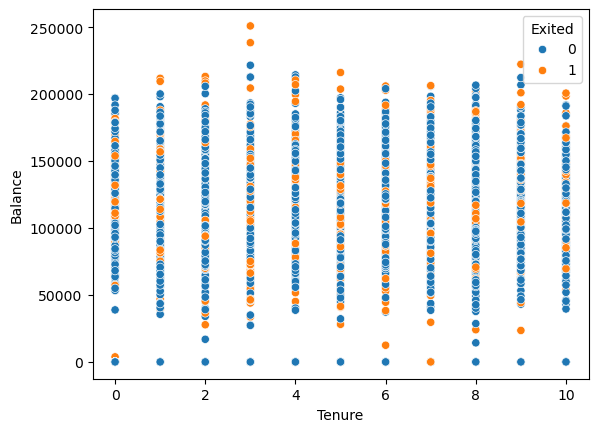

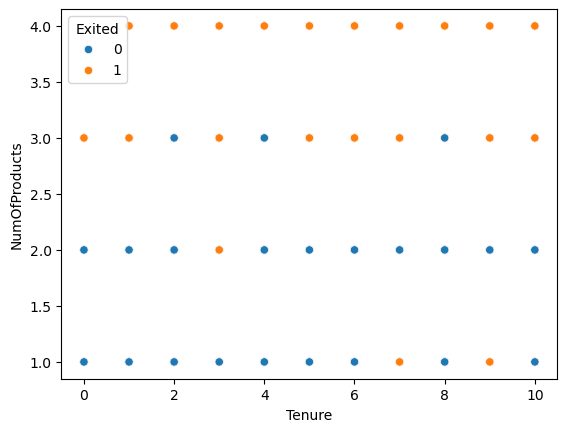

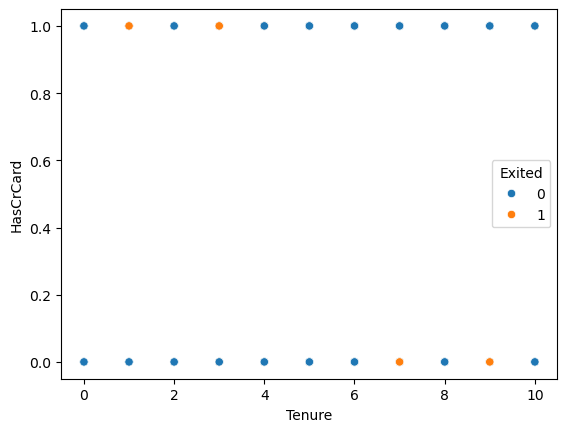

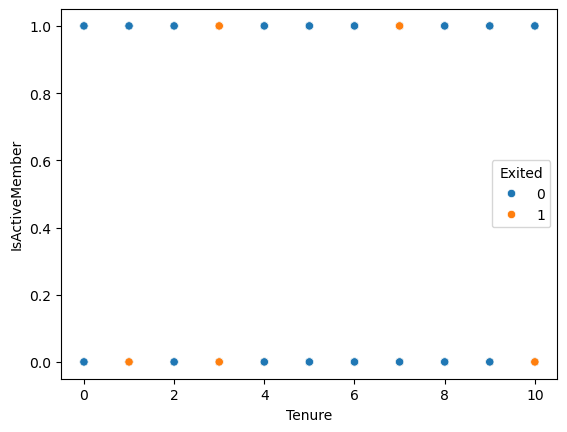

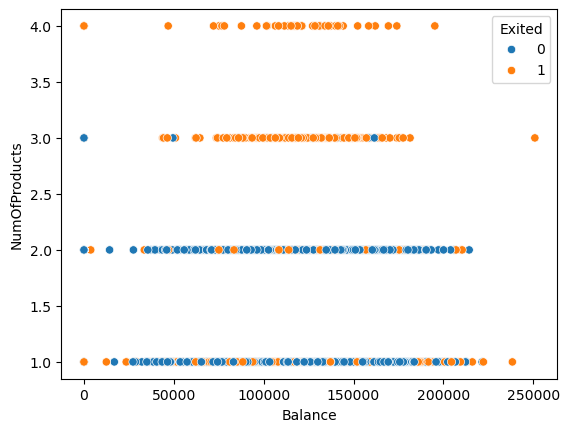

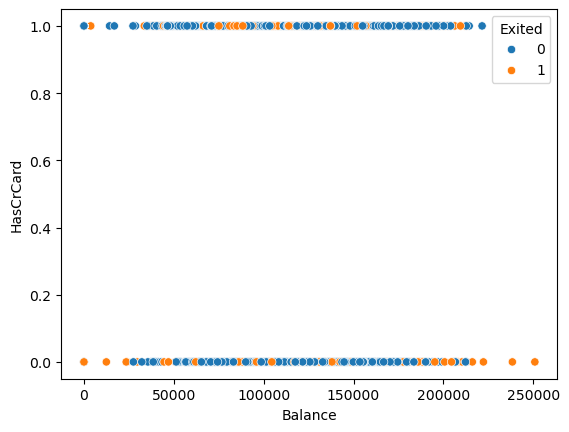

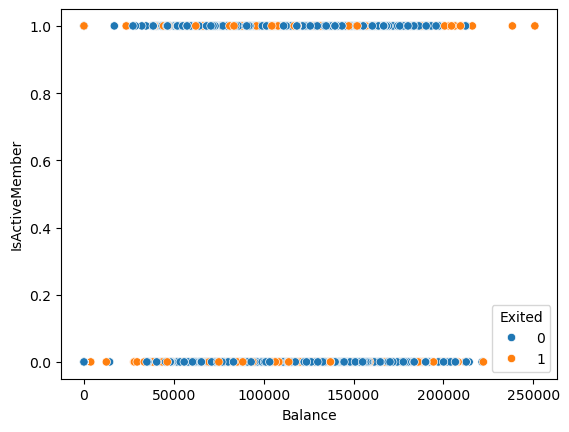

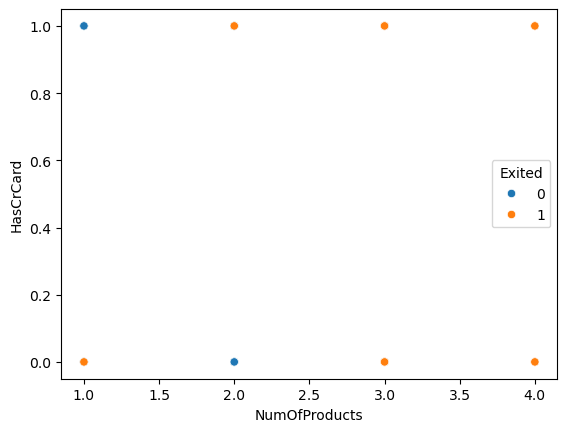

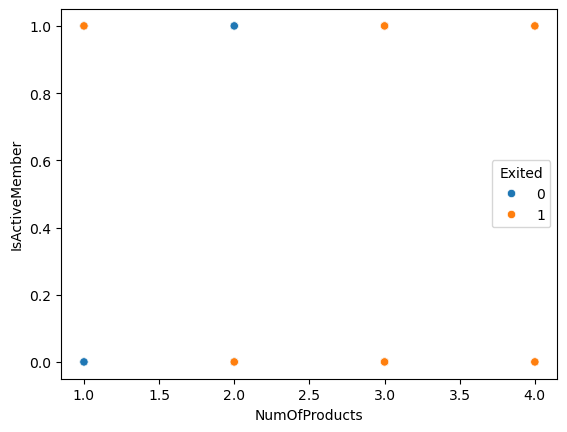

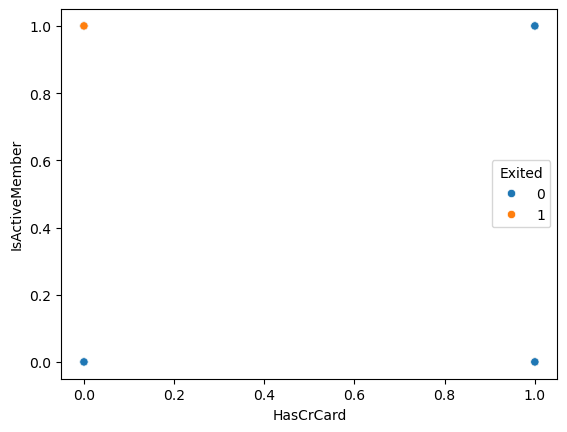

In [192]:
col=['CreditScore',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary']
num=len(col)-1

for i in range (num):
    for j in range (i+1 ,num):
        x_label=col[i]
        y_label=col[j]
        sns.scatterplot(x=x_label , y=y_label , data=clean_df,hue=exited)   
        plt.show()

In [280]:
clean_df['product_per_year']=clean_df['NumOfProducts'] / clean_df['Tenure']
clean_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,0.500000
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,1.000000
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0.375000
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,2.000000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0.400000
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0.100000
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,0.142857
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,0.666667


In [223]:
clean_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.454300,0.545700,inf
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.497932,0.497932,NaN
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-01
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e-01
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000,1.000000,3.333333e-01
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000,1.000000,6.666667e-01
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,inf


In [225]:
clean_df['product_per_year']=np.where(clean_df.Tenure==0, clean_df.NumOfProducts, clean_df.NumOfProducts / clean_df.Tenure)

In [226]:
clean_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.454300,0.545700,0.508523
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.497932,0.497932,0.507921
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000,1.000000,0.333333
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000,1.000000,0.666667
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [227]:
import numpy as np
print(np.isinf(clean_df).sum())

CreditScore         0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
France              0
Germany             0
Spain               0
Female              0
Male                0
product_per_year    0
dtype: int64


In [228]:
scal=StandardScaler()
scal_df=scal.fit_transform(clean_df)
scal_df=pd.DataFrame(scal_df,columns=clean_df.columns)
scal_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.016781
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988,0.967674
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.262894
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988,2.936584
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988,-0.016781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.997204,-0.578736,-0.573809,-0.912419,0.912419,-0.213672
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0.997204,-0.578736,-0.573809,-0.912419,0.912419,-0.804344
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.719963
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,-1.002804,1.727904,-0.573809,-0.912419,0.912419,0.311371


In [229]:
silhouette_scores = []
inertia_values = []
for k in range (2,16):
    model=KMeans(n_clusters=k , n_init=10 , random_state=42)
    model.fit(scal_df)
    inertia_values.append(model.inertia_)
    silhouette_scores.append(silhouette_score(scal_df,model.labels_,metric='euclidean', random_state=42))

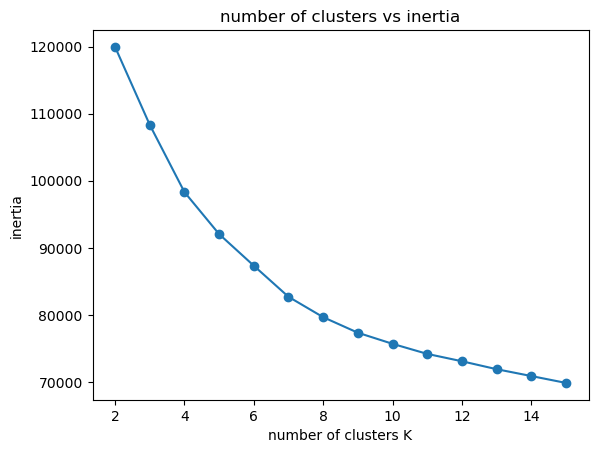

In [230]:
inertia_series=pd.Series(inertia_values , index=range(2,16))

inertia_series.plot(marker='o')
plt.xlabel('number of clusters K')
plt.ylabel('inertia')
plt.title("number of clusters vs inertia")
plt.show()

In [231]:
kmeans5=KMeans(n_clusters=5, n_init=10 , random_state=42)
kmeans5.fit(scal_df)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [232]:
from collections import Counter
print(Counter(kmeans5.labels_))

Counter({np.int32(2): 2562, np.int32(0): 2336, np.int32(1): 2329, np.int32(4): 2087, np.int32(3): 686})


<Axes: >

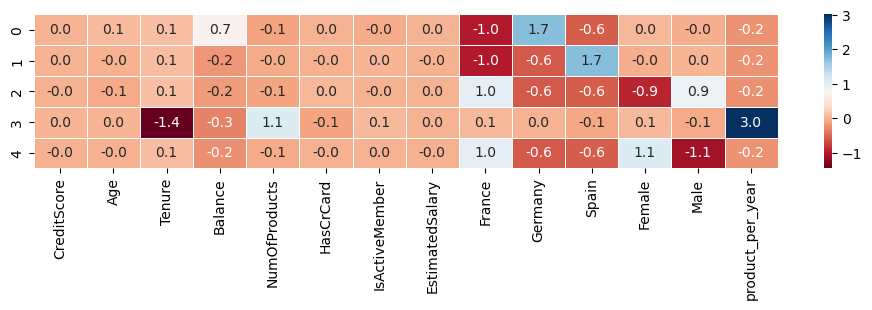

In [233]:
cluster_centers=pd.DataFrame(kmeans5.cluster_centers_,columns=scal_df.columns)
plt.figure(figsize=(12,2))
sns.heatmap(cluster_centers, linewidths=.5 , annot=True, fmt='.1f', cmap='RdBu')

In [234]:
df_geo=pd.get_dummies(df, columns=['Gender'], dtype=int)
df_geo

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,0,1


In [235]:
df_geo.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
Geography,,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.450937,0.549063
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.475488,0.524512
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.439645,0.560355


In [236]:
df_nogeo=scal_df.drop(['France', 'Germany','Spain'], axis=1)


In [237]:
sec_silhouette_scores=[]
sec_inertia_values=[]
for k in range(2,15):
    sec_model=KMeans(n_clusters=k, n_init=10, random_state=42)
    sec_model.fit(df_nogeo)
    sec_inertia_values.append(sec_model.inertia_)
    sec_silhouette_scores.append(silhouette_score(df_nogeo,sec_model.labels_, random_state=42 ,metric='euclidean'))

Text(0.5, 1.0, 'clusters vs inertia')

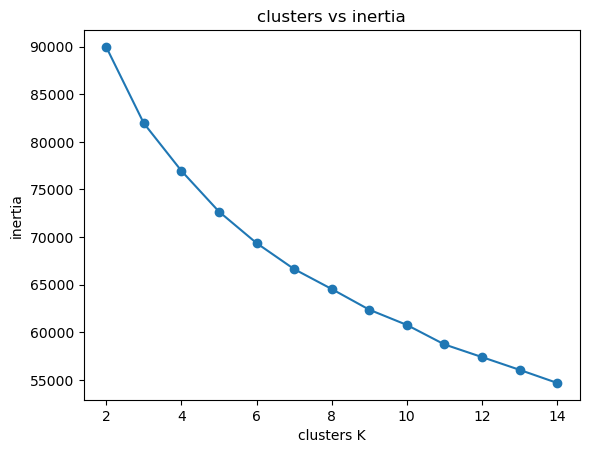

In [238]:
sec_inertia_series=pd.Series(sec_inertia_values, index=range(2,15))
sec_inertia_series.plot(marker='o')
plt.xlabel('clusters K')
plt.ylabel('inertia')
plt.title('clusters vs inertia')

In [239]:
kmeans6=KMeans(n_clusters=6, n_init=10 , random_state=42)
kmeans6.fit(df_nogeo)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [240]:
Counter(kmeans6.labels_)

Counter({np.int32(1): 2300,
         np.int32(2): 1912,
         np.int32(5): 1901,
         np.int32(3): 1781,
         np.int32(4): 1425,
         np.int32(0): 681})

<Axes: >

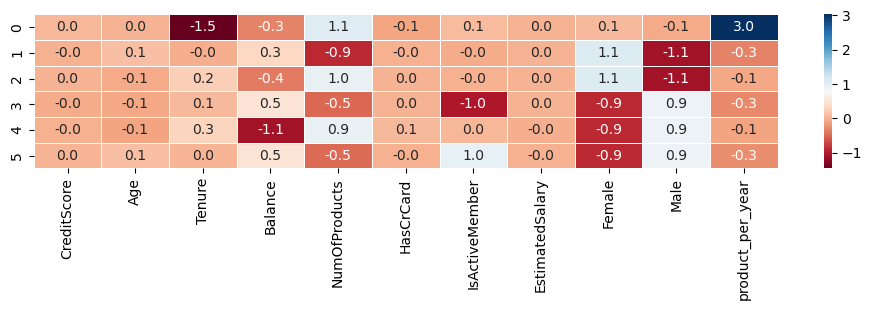

In [241]:
sec_cluster_center=pd.DataFrame(kmeans6.cluster_centers_,columns=df_nogeo.columns)
plt.figure(figsize=(12,2))
sns.heatmap(sec_cluster_center, annot=True,linewidths=.5, fmt='.1f', cmap='RdBu')

In [245]:
clean_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,0.500000
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,1.000000
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0.375000
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,2.000000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0.400000
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0.100000
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,0.142857
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,0.666667


In [259]:
final_df=pd.concat([clean_df,exited, pd.Series(kmeans6.labels_, name='cluster')], axis=1)
final_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year,Exited,cluster
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,0.500000,1,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,1.000000,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0.375000,1,2
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,2.000000,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0.500000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0.400000,0,4
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0.100000,0,5
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,0.142857,1,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,0.666667,1,3


In [281]:
final_df.groupby('cluster').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,product_per_year,Exited
cluster,,,,,,,,,,,,,,,
0,653.850220,39.051395,0.801762,56090.877445,2.145374,0.657856,0.550661,100681.185595,0.533040,0.249633,0.217327,0.48605,0.51395,2.047234,0.183554
1,649.688261,40.064348,4.953913,96932.845230,1.001739,0.703043,0.494783,100503.910970,0.485217,0.289565,0.225217,1.00000,0.00000,0.347353,0.332174
2,651.771444,38.202406,5.705544,52958.868562,2.088912,0.708159,0.508368,100824.660758,0.507845,0.229603,0.262552,1.00000,0.00000,0.466080,0.159519
3,646.039865,38.022459,5.202134,106157.708130,1.237507,0.710837,0.000000,100757.632207,0.471084,0.316115,0.212802,0.00000,1.00000,0.361471,0.269512
4,650.127018,37.651228,5.860351,8123.648414,2.078596,0.729825,0.536842,98073.588730,0.630877,0.046316,0.322807,0.00000,1.00000,0.448169,0.078596
5,653.612835,40.011573,5.083114,106162.560468,1.250395,0.699632,1.000000,99525.806376,0.434508,0.318254,0.247238,0.00000,1.00000,0.378004,0.132036
